# Making a Sentiment Analaysis NLP model using Scikit-Learn


### 1. Problem Definition
- Given a statement, can we predict the sentiment it is expressing (Postive or Negative)

### 2. Data
- A collection of 10000 amazon reviews : https://jmcauley.ucsd.edu/data/amazon/



# Question
- What is an NLP, how is sentiment analysis an NLP, and how are they different from LLM :
NLP is the overarching field that deals with language-related tasks, and sentiment analysis is a specific application within NLP. Language Models are a type of model used in NLP, with the primary focus on understanding and generating human-like text

- Some real life examples of Sentiment analysis :
Customer feedback analysis, Social media monitoring and even political opinion analysis

- How does a model actually works
- What are different types of models, explain classification and regression
- Supervised and unsupervised learning
- Different types of file formats of data
- Overfitting and Underfitting

# Load Data

# Question
- Explain different file formats in which data is usually given like json, xlsx and csv

In [ ]:
import pandas as pd
data = "/content/Books_small_10000.json"
df = pd.read_json(data, lines=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F2H80A1ZNN1N,B00GDM3NQC,Connie Correll,"[0, 0]","I bought both boxed sets, books 1-5. Really a...",5,Can't stop reading!,1390435200,"01 23, 2014"
1,AI3DRTKCSK4KX,B00A5MREAM,Grandma,"[0, 0]",I enjoyed this short book. But it was way way ...,3,A leaf on the wind of all hallows,1399593600,"05 9, 2014"
2,A3KAKFHY9DAC8A,0446547573,"toobusyreading ""Inspired Kathy""","[1, 1]",I love Nicholas Sparks. I&#8217;ve read everyt...,4,Great writing from Nicholas Sparks.,1404518400,"07 5, 2014"
3,ATYBCYD6BIXVL,0955809215,Chrissie,"[0, 0]",I really enjoyed this adventure and look forwa...,4,great,1389225600,"01 9, 2014"
4,A17K95SEU3J68U,0991500776,"Sirde ""artist761""","[0, 0]",It was a decent read.. typical story line. Not...,3,It was a decent read.. typical story line ...,1404864000,"07 9, 2014"


# Now let's start with data preprocessing

- Now what we are trying to do here is simply create a class which will iterate over our entire dataset and store it an array of objects, so basically we are simplifying how we store our data so that we can better retrieve information.

In [ ]:
import json
class Sentiment:
  NEGATIVE = "NEGATIVE"
  POSITIVE = "POSITIVE"

class Review:
  def __init__(self, text, score):
    self.text = text;
    self.score = score;
    self.sentiment = self.getSentiment();

  def getSentiment(self):
    if self.score <= 2:
      return Sentiment.NEGATIVE;
    else:
      return Sentiment.POSITIVE;

reviews = []
with open(data) as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review['reviewText'], review['overall']))

In [ ]:
print(reviews[9999].text)
print(reviews[9999].score)
print(reviews[9999].sentiment)

Highly recommend this entire trilogy. It is very well written and held me in suspense and kept me reading.  Even with the same old young girl heroine who goes head strong and hell bent on saving the new world, id tecommend this book to dystopian fiction fans!  Not overdone, thankfully! A fesw situations made it feel like I've read this same plot before....but these were well thought out and much better written!  This authr has a gift a d I will be looking forward to reading more of ber work.
4.0
POSITIVE


# Now let's display what our new dataset, an array is looking like

In [ ]:
# Assuming 'reviews' is your list of Review objects
review_data = [(review.text, review.score, review.sentiment) for review in reviews]

# Creating a DataFrame from the review data
df_reviews = pd.DataFrame(review_data, columns=['Review Text', 'Score', 'Sentiment'])

# Displaying the DataFrame
print(df_reviews)

                                            Review Text  Score Sentiment
0     I bought both boxed sets, books 1-5.  Really a...    5.0  POSITIVE
1     I enjoyed this short book. But it was way way ...    3.0  POSITIVE
2     I love Nicholas Sparks. I&#8217;ve read everyt...    4.0  POSITIVE
3     I really enjoyed this adventure and look forwa...    4.0  POSITIVE
4     It was a decent read.. typical story line. Not...    3.0  POSITIVE
...                                                 ...    ...       ...
9995  The whole series was great!  Melody is a fanta...    5.0  POSITIVE
9996  I didn't thing that much of this book.  I am a...    3.0  POSITIVE
9997  It is an emotional TRIP to the past with Trip ...    5.0  POSITIVE
9998  This definitely got under my veins whereby I h...    5.0  POSITIVE
9999  Highly recommend this entire trilogy. It is ve...    4.0  POSITIVE

[10000 rows x 3 columns]


- Now our dataset is prepared to use, lets visualize the number of positive and negative datasets.

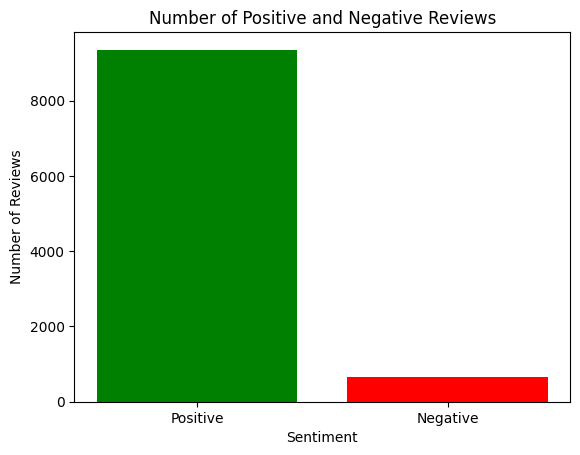

In [ ]:
import matplotlib.pyplot as plt
# Count the number of positive and negative reviews
positive_count = sum(1 for review in reviews if review.sentiment == Sentiment.POSITIVE)
negative_count = sum(1 for review in reviews if review.sentiment == Sentiment.NEGATIVE)

# Plot the bar chart
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Number of Positive and Negative Reviews')
plt.show()

- Now let's create a function that can easily allow us to manipulate this reviews[] array. This function is going to perform three main functions:
1. Provide us the reviews from our array
2. Provde us the score from our array
3. And evenly distribute the number of positive and negative reviews in our dataset.

In [ ]:
class ReviewContainer():
  def __init__(self, reviews):
    self.reviews = reviews;

  def get_text(self):
    return [x.text for x in self.reviews]

  def get_sentiment(self):
    return [x.sentiment for x in self.reviews]

  def evenly_distribute(self):
    negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
    positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
    positive_shrunk = positive[:len(negative)]
    self.reviews = negative + positive_shrunk
    random.shuffle(self.reviews)

# Question
- Explain why having this uneveness in data is a problem

# Let's prepare our data

# Question
- How does a model actually work, we give it x and we give it y and it developes the function F, so let's split data into x and y.

- What is train test split

- What is train_x, train_y

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(reviews, test_size = 0.25, random_state = 42)

train = ReviewContainer(train)
test = ReviewContainer(test)

# let's fix the problem by running the evenly distribute function

#  def evenly_distribute(self):
#     negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
#     positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
#     positive_shrunk = positive[:len(negative)]
#     self.reviews = negative + positive_shrunk
#     random.shuffle(self.reviews)

train.evenly_distribute()
test.evenly_distribute()

train_x = train.get_text()
train_y = train.get_sentiment()


test_x = test.get_text()
test_y = test.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(test_y.count(Sentiment.NEGATIVE))

486
158


- Let's visualize the number of positive and negative sentiments now:

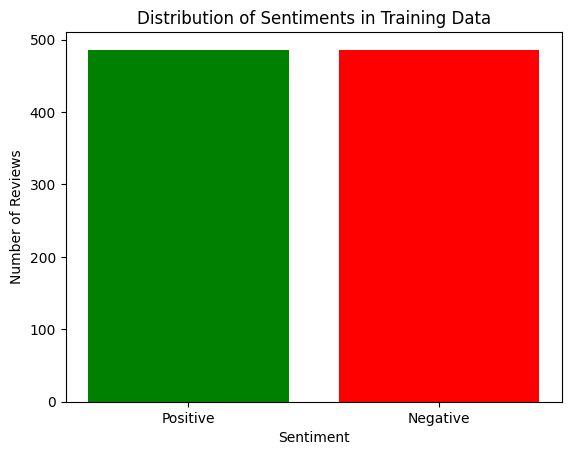

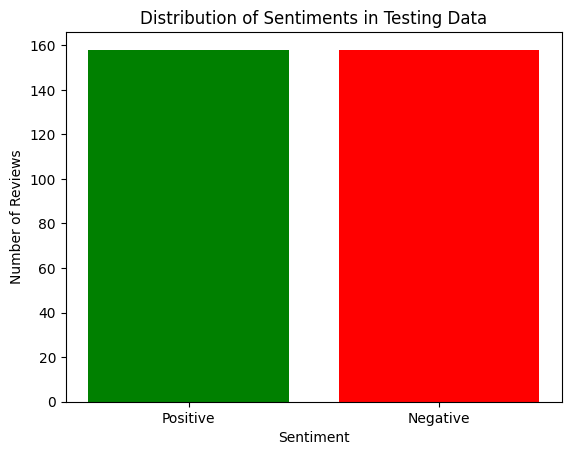

In [ ]:
# Display the distribution of sentiments in training data
train_sentiments = train_container.get_sentiment()
train_sentiment_counts = [train_sentiments.count(Sentiment.POSITIVE), train_sentiments.count(Sentiment.NEGATIVE)]

plt.bar(['Positive', 'Negative'], train_sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Training Data')
plt.show()

# Display the distribution of sentiments in testing data
test_sentiments = test_container.get_sentiment()
test_sentiment_counts = [test_sentiments.count(Sentiment.POSITIVE), test_sentiments.count(Sentiment.NEGATIVE)]

plt.bar(['Positive', 'Negative'], test_sentiment_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiments in Testing Data')
plt.show()

# There is one last thing we need to do to our data before we start creating our Model
- That is convert our text data to numerical input so that our machine can learn from it.

### Bag of Words Vectorizer
- A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs.
-Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.
1. Tokenization : breaking down the text into words
2. Vocabulary Creation : A unique set of all the words in the dataset is created, called as the vocabulary
3. Counting word occurences : How many times each word appears in the document
https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()

#  It learns the mapping between words in the documents and the corresponding feature indices.
train_x_vectors = vectorizer.fit_transform(train_x)

# We won't fit the vectorizer again because we want to use the training dataset vocabulary for the testing data as well
test_x_vectors = vectorizer.transform(test_x)

# let's have a look at what our data is looking like now
print(train_x[0])
print(train_x_vectors[0].toarray())

I don't think a whole lot of Beth Moore books. I find them uninspiring and rather boring. Total waste of hard earned money!
[[0. 0. 0. ... 0. 0. 0.]]


# Now let's start building our models
### There are mainly two types of models : Classification and Regression
- The model that we are going to be building are called as classification models because the problem that we are trying to solve is classify reviews into positive and negative sentiments.

- We are going to build four different classifier models and then choose the best one out of the four and further improve it.

### Linear SVM
1. Imagine a playground:
- Think of a playground where you have two groups of kids playing, and there's a clear gap between them.
2. Goal:
- Now, you want to draw a line on the ground to separate these two groups so that each group stays on its side. This line is your decision boundary.
3. SVM's Role:
- The support vector machine (SVM) is like the friend you bring along who helps you draw the best possible line, making sure it maximizes the space between the two groups
4. Machine learning analogy:
- These two groups represent different classes or categories. The SVM helps find the best possible line to separate these classes

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

# Lets first initialize and fit our model to the training data
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(train_x_vectors, train_y)

SVC(kernel='linear')

### Decision Tree
- Imagine you have an animal in mind and someone is trying to guess what is that animal is in your mind.
- The decision tree starts with a broad question like, "Does it live in water?" If the answer is yes, it might ask, "Is it a fish?" If the answer is no, it might as, "Does it have fur?" The questions keep getting more specific until the person accurately guesses the animal
- In machine learning tree, in a decision tree, each questions corresponds to a feature about the data. The features guide the tree to make decision and classify data into different categories

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Lets initializa and fir out model to the training data
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

DecisionTreeClassifier()

### Naive Bayes
- This type of classifier starts with some predefined assumption in mind, like the precense of some words might make it bad or good.
- Imagine you have an email and you want to classify it as good or bad.
- The Naive Bayes classifier starts with the assumption that the presence of certain words in an email is indicative of it being spam or not. For example, if the word "discount" is present, it might increase the likelihood of the email being spam.

### Explain what is dense data and what is sparse data

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Lets initialize
clf_gnb = GaussianNB()

# We need to convert our sparse matrix to a dense numpy array in order for our model to learn from it
dense_train_x = train_x_vectors.toarray()
dense_test_x = test_x_vectors.toarray()

# Now let's actually train our model
clf_gnb.fit(dense_train_x, train_y)

GaussianNB()

### Logistic Regression
- Even though the name is regression it is actually a classification model
- But the process it uses for classification is based on making prediction
- Based on the words present in a review it makes a prediction whether it should be positive or not, if the prediction is above a certain number it is positive else negative

In [ ]:
from sklearn.linear_model import LogisticRegression

# Lets initialize and fit our model to the training data
clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)

LogisticRegression()

### Now since we have trained all our models to the training data, it is time to move on the evaluation part and see which is the best one.

# Evalutaion
- We are going to use two metrics for evaluation i.e. score and F1Score
- What is evaluation phase
- Mean accuracy is like an overall grade for the model, considering all classes.
F1 score is like a focused assessment, looking at how well the model balances between precision and recall, especially when dealing with imbalanced datasets.

### Mean Accuracy
- A simple and straightforward metric, It takes the total number of correct predictions and divides it by the total number of predictions made.

In [ ]:

print(clf_svm.score(test_x_vectors, test_y))
print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(dense_test_x, test_y))
print(clf_log.score(test_x_vectors, test_y))

0.8006329113924051
0.6392405063291139
0.6234177215189873
0.8037974683544303


### F1 Score
- In some datasets, one class may be more prevalent than others. Mean accuracy might be high if the model is good at predicting the majority class but performs poorly on minority classes.
- F1 score helps highlight issues with false positives and false negatives, providing a more balanced evaluation.


In [ ]:
from sklearn.metrics import f1_score

print(f1_score(test_y, clf_svm.predict(test_x_vectors), average = None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_dec.predict(test_x_vectors), average = None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_gnb.predict(dense_test_x), average = None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))
print(f1_score(test_y, clf_log.predict(test_x_vectors), average = None, labels=[Sentiment.POSITIVE, Sentiment.NEGATIVE]))

[0.80126183 0.8       ]
[0.65868263 0.61744966]
[0.63608563 0.60983607]
[0.80379747 0.80379747]


### It looks like the SVM and the Logistic Regression model both are doing good, so let's proceed with those two.

### Before we move on and improve these two models, let's test them by entering some text of our own

In [ ]:
# Let's enter some input of our own
custom_input = ['The best investment of my life', "Bad book, absolutely horrible", "You won't regret purchasing it", "It was truly a delight reading this book", "this book was beyond amazing! the best murder mystery book i have EVER read, the suspects are never too obvious and nor are they out of the blue, with the way holly jackson writes, you'd feel like you yourself were investigating! she writes so realistically, the characters feel so life-like, every character is understandable and the plot is marvellous, cant wait to get the rest of the series and i know i wont be disappointed. i have never gasped out loud to a book so many times but here we are with this book, i cant begin to describe how good it was, you think its over, you think everything's cooled down and solved and then bam, another story opens up. love love love this book, definitely recommend."]
# Lets convert these inputs to numbers so that our model can learn
custom_input_vectors = vectorizer.transform(custom_input)

print(clf_svm.predict(custom_input_vectors))
print(clf_log.predict(custom_input_vectors))
print(clf_dec.predict(custom_input_vectors))

['POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE']
['POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE']
['POSITIVE' 'POSITIVE' 'POSITIVE' 'NEGATIVE' 'POSITIVE']


### Now let's see if we can improve our model even further

# Tuning our model
- What do we mean by tuning our model
- For this we are going to use GridSeachCV

- Parameters can be considered as configurations or settings of a certain model that we can adjust in order to improve the overall model.

### Kernels
- They are mostly used in SVM,  are a way to transform input data into a higher-dimensional space.
- Imagine you have a dataset with points that cannot be separated by a straight line. By using a kernel, you can transform the data into a higher-dimensional space where a hyperplane (decision boundary) can effectively separate the classes.

### C (Cost parameter)
- This parameter is also primarily used in SVM, a small C means a simple and smooth curve which might allow a few points to misclassify
- A higher C value will now allow any points to misclassify even if it means the model is overly complex

### Penalty
- Similar to C, they are simply used to prevent the model from being overfitting by not allowing it be get overly complex

### Overfitting
- Memorizing not learning

### Underfitting
- Overly simplyfying the model and not learning enough

### Grid Search CV
- Grid Search CV is like systematically trying every combination of ingredients to find the best recipe for delicious cookies. Similarly, it systematically explores various hyperparameter combinations to find the best-performing machine learning model.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Lets setup grid search CV for SVM
parameters = {"kernel": ("linear", "rbf"), "C": (1, 4, 8, 16, 32)}
clf_svm = svm.SVC()
best_clf_svm = GridSearchCV(clf_svm, parameters, cv = 5)
best_clf_svm.fit(train_x_vectors, train_y)

# Now since we know what are the best parameters, lets have a look at them
best_params = best_clf_svm.best_params_
print("Best Parameters: ", best_params)

# Now let's see if the accuracy has improved or not
test_predictions = best_clf_svm.predict(test_x_vectors)
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy on Test Set:", accuracy)

Best Parameters:  {'C': 1, 'kernel': 'linear'}
Accuracy on Test Set: 0.8006329113924051


In [ ]:
# Now lets setup grid search CV for Logistic Regression model
# We will start by intializing our model
clf_log = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # regularization parameter
    'penalty': ['l2']  # lbfgs solver supports only 'l2' or 'none'
}


clf_log = GridSearchCV(clf_log, param_grid, cv = 5, scoring="accuracy")

clf_log.fit(train_x_vectors, train_y)

print("Best Hyperparameters: ", clf_log.best_params_)

best_clf_log = clf_log.best_estimator_

predictions = best_clf_log.predict(test_x_vectors)

accuracy = accuracy_score(test_y, predictions)
print("Accuracy on test set: ", format(accuracy * 100))

Best Hyperparameters:  {'C': 1, 'penalty': 'l2'}
Accuracy on test set:  80.37974683544303


# Well now we know what is the best model is, it is SVM for the following problem we are trying
- Lets check our custom inputs on this model as well

In [ ]:
# Let's enter some input of our own
custom_input = ['The best investment of my life', "Bad book, absolutely horrible", "You won't regret purchasing it", "It was truly a delight reading this book", "this book was beyond amazing! the best murder mystery book i have EVER read, the suspects are never too obvious and nor are they out of the blue, with the way holly jackson writes, you'd feel like you yourself were investigating! she writes so realistically, the characters feel so life-like, every character is understandable and the plot is marvellous, cant wait to get the rest of the series and i know i wont be disappointed. i have never gasped out loud to a book so many times but here we are with this book, i cant begin to describe how good it was, you think its over, you think everything's cooled down and solved and then bam, another story opens up. love love love this book, definitely recommend."]
# Lets convert these inputs to numbers so that our model can learn
custom_input_vectors = vectorizer.transform(custom_input)

print(best_clf_svm.predict(custom_input_vectors))

['POSITIVE' 'NEGATIVE' 'NEGATIVE' 'NEGATIVE' 'POSITIVE']


### Supervised Learning
- Supervised learning is like having a helpful teacher guide a student through their homework. In this type of machine learning, the model is trained on a labeled dataset, where each example comes with both input data and the correct output (label).
- In the sentiment analysis model we created, each movie review in the training data was labeled with its sentiment (positive or negative). The model learned from these labeled examples to predict the sentiment of new, unseen movie reviews.